# Lecture 7 - Evaluation Metrics & Feature Selection

# Classification

* So far, we have focused on regression. We will begin to discuss classification.

* The goal in **classification** is to take an input vector, **X**, and assign it to one of $K$ discrete classes.  

* Usually this is done by learning **decision boundaries** or **decision surfaces** that divide up the feature space and assign a class to each partition of the feature space created by the decision boundary. 

* Data whose classes can be separated perfectly with a linear decision surface (i.e., a line in 2-D, a plane in 3-D, etc) are called **linearly separable**. These are the easiest classification problems to address. 

    * There are *many* classifiers in the machine learning literature. We will cover a few in this class.

* You can **encode class labels** in a number of ways: binary vectors, class number, etc. Different encodings make sense in different situations. But you want to select carefully - depending on the algorithm you use, it can make a difference. 

# Typical Workflow of a Supervised Learning System

1. **Data Acquisition**

One of the most (if not the one) crucial steps in building a supervised learning system. The collected data will have a tremendous impact on the subsequent steps of the machine learning system including: feature extraction, model selection and model validation.

2. **Feature Extraction**

Sometimes the data you are working with was already collected and features were extracted, so you will have little control of the first two steps, other than some feature engineering you may wish to apply.
When you do have control of your data, feature extraction will also be an important step. We will discuss more details on this broad topic, specifically for image data.

3. **Pre-processing**

In this stage you will prepare the data to be *fed* into the system. Data pre-processing include **normalization**. This can be a big difference in the results. Always normalize the data.

4. **Model Selection**

Selecting the model can be influenced by any information you may have about the data.

5. **Hyperparameter Tuning**

In this step you will be mostly trying to find the set of parameters that fit the data the best but avoid overfitting. This includes implementing strategies such as: regularization, k-fold cross-validation and plotting learning curves.

There are useful modules from the ```scikit-learn``` library that you should take some time reading and learning about: from the module ```preprocessing```, read about function ```StandardScaler```; from the module ```cross_validation```, read about function ```cross_val_score```; from module ```learning_curve```, read about function ```learning_curve```; from module ```grid_search```, read about function ```GridSearchCV```. 

6. **Model Evaluation**

The last step of a supervised learning system is to report on the model's performance. This may include any statistical measures such as: mean average error, Quantile-Quantile (Q-Q) plot and hypothesis tests. If you want to answer the question "Is A a more accurate algorithm than B?", this becomes the hypothesis "Can we say that the average error of learners trained by A is significantly lower than the average error of learners trained by B?". So we can design statistical tests and measures to evaluate the models.

But you can also look at different performance metrics. This next section will discuss different performance metrics.

# Performance Evaluation Metrics

A key step in supervised learning system workflow is determining an *appropriate* performance evaluation metric.

**Evaluation metrics** help us to estimate how well our model is trained and it is important to pick a metric that matches our overall goal for the system.

Some common evaluation metrics include precision, recall, receiver operating curves, and confusion matrices.

## Classification Accuracy and Error

Classification accuracy and e the number of correct predictions made as a ratio of all predictions made.

* **Classification accuracy** is defined as the number of correctly classified samples divided by all samples:

$$\text{accuracy} = \frac{N_{\text{corr}}}{N}$$

where $N_{\text{corr}}$ is the number of correct classified samples and $N$ is the total number of samples.

* **Classification error** is defined as the number of incorrectly classified samples divided by all samples:

$$\text{error} = \frac{N_{\text{miss}}}{N}$$

where $N_{\text{miss}}$ is the number of misclassified samples and $N$ is the total number of samples.

* Classification accuracy is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

### Example 1: Fish Dataset
Suppose there is a 3-class classification problem, in which we would like to classify each training sample (a fish) to one of the three classes (A = salmon or B = sea bass or C = cod).

Let's assume there are 150 samples, including 30 salmon, 40 sea bass and 80 cod. Suppose our model misclassifies 4 salmon, 2 sea bass and 5 cod.

* The classification accuracy (ACC) of our binary classification model is calculated as:

$$\text{ACC} = \frac{26 + 38 + 75}{30 + 40 + 80} = \frac{139}{150} \approx 92.7 \%$$

* The prediction error is calculated as:

$$\text{error} = \frac{4 + 2 + 5}{30+40+80} = \frac{11}{150} \approx 7.3 \%$$

* The classification accuracy doesn't really give an insight on which class is being misclassified the most.

## Confusion Matrix

A confusion matrix summarizes the classification accuracy across several classes. It shows the ways in which the classification model is confused when it makes predictions, allowing visualization of the performance of our algorithm. 

Generally, each row represents the instances of a actual class while each column represents the instances in an predicted class.

If the classifier is trained to distinguish between salmon, sea bass and cod. We can summarize the prediction result in the confusion matrix as follows:

|actual/predict|    salmon    |    sea bass  |      cod     |
|--------------|--------------|--------------|--------------|
|    salmon    |      26      |       2      |       2      |
|    sea bass  |       2      |       38     |       3      |
|      cod     |       2      |       3      |       75     |


In this confusion matrix, of the 30 salmons (row 1), the classifier predicted that 26 are labeled salmon correctly, 2 are wrongly labeled as sea bass, and another 2 are wrongly labeled as cod. 

All correct predictions are located in the diagonal of the table. So it is easy to visually inspect the table for prediction errors, as they will be represented by values outside the diagonal.

## Precision, Recall & Fall-Out

We are often looking to discriminate between observations with a specific binary outcome, for example, event or no event. In our example, the fish company would like to produce salmon can but the harvest contains all three species. In this way,
we can assign the event (salmon) as "positive" and no-event (not salmon) as "negative".

The confusion matrix for this two-class classification problem is:

|actual/predicted|    salmon    |  non-salmon  |
|----------------|--------------|--------------|
|     salmon     |      26      |       4      |
|   non-salmon   |       7      |      113     |

* **True positive (TP):** correctly predicting positive events
* **False positive (FP):** incorrectly calling positive to a negative event
* **True negative (TN):** correctly predicting negative events
* **False negative (FN):** incorrectly labeling negative to a positive event

*In this salmon/non-salmon classification problem, what are the TP, FP, TN, FN values?*

|actual/predicted|   Positive   |   Negative   |
|----------------|--------------|--------------|
|    Positive    |      TP      |      FN      |
|    Negative    |      FP      |      TN      |

* **Precision**, also called Positive Predictive Value (PPV), is the performance of detection

$$\text{Precision} = \text{PPV} = \frac{TP}{TP + FP}$$

* **Recall**, also called True Positive Rate (TPR) or Sensitivity, is the probability of detection

$$\text{Recall} = \text{TPR} = \text{Sensitivity} = \frac{TP}{TP + FN}$$

* **Fall-out**, also called False Positive Rate (FPR), is the probability of false alarm

$$\text{Fall-out} = \text{FPR} = \frac{FP}{FP + TN}$$

* **Specificity**, also called True Negative Rate (TNR), is the probability of negative events detection

$$\text{Specificity} = \frac{TN}{TN + FP}$$

<!--* **F1-score**, also called F-score or F-measure, is a measure of a model's accuracy. It considers both the precision and the recall-->

<!--$$\text{F1-score} = 2\times\frac{\text{Precision}\times \text{Recall}}{\text{Precision} + \text{Recall}}$$-->

* Learn about many other measures on the [Wikipedia page](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) and [Scikit-Learn Metrics Module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

## ROC Curves

**Receiver Operating Characteristic (ROC) curve** is the plot between the true positive rate (TPR) and the false positive rate (FPR), where the TPR is defined as the y-axis and FPR is defined as the x-axis.

* ROC curves were first developed for RADAR systems, hence the name.

* Given a binary classifier and its threshold, the (x,y) coordinates of ROC space can be calculated from all the prediction result. You trace out a ROC curve by varying the threshold to get all of the points on the ROC.

* The diagonal between (0,0) and (1,1) separates the ROC space into two areas, which are left up area and right bottom area. The points above the diagonal represent good classification (better than random guess) which below the diagonal represent bad classification (worse than random guess).

* *What is the perfect prediction point in a ROC curve?*


### Area Under the Curve (AUC)

**Area Under Curve (AUC)** is a common measure of how good a test is. It is simply the area under the ROC curve. Random guessing can achieve the diagonal line, so the minimum AUC is 1/2. The maximum AUC is 1, which is achieved by a test that is always right; the ROC curve is along the left and top axes.

### Example

1. Suppose you have a target detection task that you would like to evaluate using ROC curve analysis. You emplaced 10 targets and collected aerial hyperspectral imagery over 10 $km^2$. Then, suppose you ran a set of alarm generation and target detection algorithms over the collecte data. Your algorithms produced the following list of alarm confidence values. You have already matched each of these alarms to a location on the ground and compared them with you ground truth. True targets, based on your ground truth, are marked with a "T" in the second column. Draw the associated ROC cure for these results.

|  0.91  |  0.90  |  0.80  |  0.79  |  0.77  |  0.75  |  0.50  |  0.40  |  0.39  |  0.38  |  0.37  |  0.25  |  0.10  |  0.09  |  0.01  |
|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
|   T    |   T    |        |   T    |        |        |        |   T    |        |        |        |        |        |   T    |        |


2. Suppose you were segmenting a data set into three classes (e.g., vegetation, man-made materials, sand) and wanted to evaluate your results. Would sing a ROC curve be an appropriate method for evaluation? Why or why not?

* Check the list of performance evaluation metrics in the scikit-learn module called "metrics". Find it [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

# Feature Selection

Suppose that you are building the experimental design for your machine learning algorithm from a provided data set. Your first setp should include feature selection. 

In this section, we will discuss a few techniques to perform feature selection.

### Example: Wine Dataset

Let's work through with the Wine dataset, an open-source dataset that is available from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Wine); it consists of 178 wine samples with 13 features describing their different chemical properties.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import pandas as pd

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

In [4]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
print('Class labels ', np.unique(df_wine['Class label']))

Class labels  [1 2 3]


The samples belong to one of three different classes, 1, 2, and 3, which refer to the three different types of grapes that have been grown in different regions in Italy.

## Partitioning a dataset in training and test sets

A convenient way to randomly partition this dataset into a separate test and training dataset is to use the ```train_test_split``` function from scikit-learn's model_selection submodule:

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Bringing features onto the same scale

**Feature scaling** is a crucial step in our pre-processing pipeline that can easily be forgotten. Decision trees and random forests are one of the very few machine learning algorithms where we don't need to worry about feature scaling. However, the majority of machine learning and optimization algorithms behave much better if features are on the same scale.

Now, there are two common approaches to bringing different features onto the same scale: **normalization** and **standardization**. Those terms are often used quite loosely in different fields, and the meaning has to be derived from the context. 

* Most often, **normalization** refers to the rescaling of the features to a range of $[0, 1]$, which is a special case of *min-max scaling*. To normalize our data, we can simply apply the min-max scaling to each feature column, where the new value $x_{\text{norm}}^{(i)}$ of a sample $x^{(i)}$ can be calculated as follows:

$$x_{\text{norm}}^{(i)} = \frac{x^{(i)} - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$$

Here, $x^{(i)}$ is a particular sample, $x_{\text{min}}$ is the smallest value in a feature column, and $x_{\text{max}}$ the largest vaues, respecively.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mms = MinMaxScaler()

In [11]:
X_train_norm = mms.fit_transform(X_train)

In [12]:
X_test_norm = mms.transform(X_test)

* Using **standardization**, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights. Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.

$$x_{\text{std}}^{(i)} = \frac{x^{(i)} - \mu_x}{\sigma_x}$$

Here, $\mu_x$ is the sample mean of a particular feature column and $\sigma_x$ the corresponding standard deviation, respectively.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
stdsc = StandardScaler()

In [18]:
X_train_std = stdsc.fit_transform(X_train)

In [19]:
X_test_std = stdsc.fit_transform(X_test)

Let's compare the two:

In [20]:
print('Sample | Normalization  | Standardization')
for i in range(10):
    print(str(i) + '      | '+ str(X_train_norm[i,0])+ ' | '+ str(X_train_std[i,0]))

Sample | Normalization  | Standardization
0      | 0.7552631578947371 | 1.049608201745632
1      | 0.8342105263157893 | 1.4090101264965271
2      | 0.7052631578947373 | 0.8219869827367314
3      | 0.47894736842105257 | -0.20829853488250666
4      | 0.7394736842105263 | 0.9777278167954521
5      | 0.2131578947368422 | -1.4182850148771913
6      | 0.2763157894736845 | -1.130763475076474
7      | 0.8078947368421052 | 1.2892094849128954
8      | 0.26578947368421035 | -1.178683731709928
9      | 0.7131578947368422 | 0.8579271752118204


* It is also important to highlight that we fit the StandardScaler **only once** on the training data and use those parameters to transform the test set or any new data point.

## Selecting meaningful features

If we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator for overfitting. Overfitting means that model fits the parameters too closely to the particular observations in the training dataset but does not generalize well to real data—we say that the model has a high variance. A reason for overfitting is that our model is too complex for the given training data and common solutions to reduce the generalization error are listed
as follows:

* Collect more training data

* Introduce a penalty for complexity via regularization

* Choose a simpler model with fewer parameters

* Reduce the dimensionality of the data

Let's look at common ways to reduce overfitting by regularization and dimensionality reduction via feature selection. In particular:

1. Sparse solutions with L1 regularization, and

2. Sequential feature selection algorithms

### 1. Sparse solutions with L1 regularization

Recall our Linear Regression problem where we used the **L2 regularization** approach to reduce the complexity of a model by penalizing large individual weights, where we defined the L2 norm of our weight vector $\mathbf{w}$ as follows:

$$\text{L2: }\Vert\mathbf{w}\Vert_2^2 = \sum_{j=0}^M w_j^2$$

Another approach to reduce the model complexity is the related **L1 regularization**:

$$\text{L1: }\Vert\mathbf{w}\Vert_1 = \sum_{j=0}^M |w_j|$$

In contrast to L2 regularization, L1 regularization yields sparse feature vectors; most feature weights will be zero. Sparsity can be useful in practice if we have a high-dimensional dataset with many features that are irrelevant, especially cases where we have more irrelevant dimensions than samples. In this sense, L1 regularization can be understood as a technique for feature selection.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
lr = LogisticRegression(penalty='l1', C=0.1, multi_class='auto')

In [24]:
lr.fit(X_train_std, y_train)

C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print('Training accuracy: ',lr.score(X_train_std, y_train))

Training accuracy:  0.9838709677419355


In [26]:
print('Test accuracy: ',lr.score(X_test_std, y_test))

Test accuracy:  0.9814814814814815


Both training and test accuracies (both 98 percent) do not indicate any overfitting of our model. When we access the intercept terms via the lr.intercept_ attribute, we can see that the array returns three values:

In [27]:
lr.intercept_

array([-0.34653677, -0.09057797, -0.79264496])

Since we the fit the LogisticRegression object on a multiclass dataset, it uses the One-vs-Rest (OvR) approach by default where the first intercept belongs to the model that fits class 1 versus class 2 and 3; the second value is the intercept of the model that fits class 2 versus class 1 and 3; and the third value is the intercept of the model that fits class 3 versus class 1 and 2, respectively:

In [28]:
lr.coef_

array([[ 0.25903179,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.58580005,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.40763035],
       [-0.60106736, -0.27374808, -0.03608419,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.9157612 ,
         0.        ,  0.        , -0.49752282],
       [ 0.        ,  0.16223462,  0.        ,  0.        ,  0.        ,
         0.        , -0.67336517,  0.        ,  0.        ,  0.52661357,
        -0.35210503, -0.37609701,  0.        ]])

The weight array that we accessed via the lr.coef_ attribute contains three rows of weight coefficients, one weight vector for each class. Each row consists of 13 weights where each weight is multiplied by the respective feature in the 13-dimensional Wine dataset to calculate the net input:

$$\mathbf{y} = w_0x_0 + w_1x_1 + \cdots + w_M x_M = \sum_{j=0}^M x_j w_j = \mathbf{w}^T\mathbf{x}$$

We notice that the weight vectors are sparse, which means that they only have a few non-zero entries. As a result of the L1 regularization, which serves as a method for feature selection, we just trained a model that is robust to the potentially irrelevant features in this dataset.

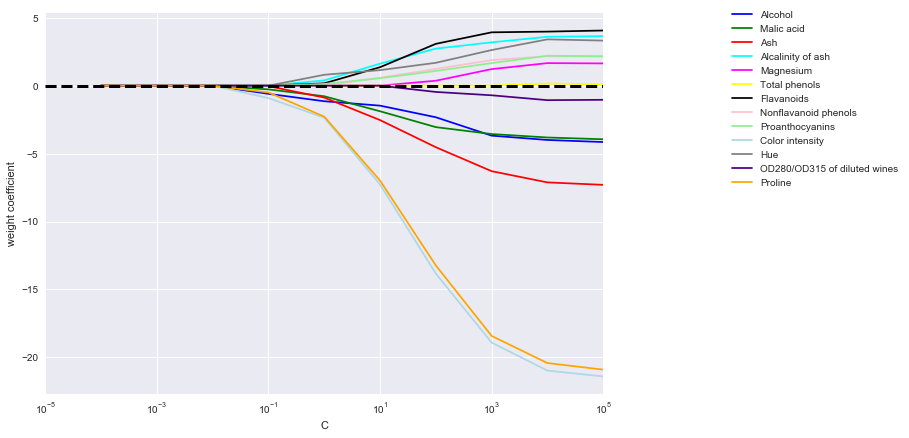

In [29]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black','pink', 'lightgreen',
          'lightblue','gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10.0**c, random_state=0, solver='liblinear', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
    w = np.array(weights)
    
for column, color in zip(range(w.shape[1]), colors):
    plt.plot(params, w[:, column], label=df_wine.columns[column+1],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10.0**(-5), 10.0**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left',)
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

The resulting plot provides us with further insights about the behavior of L1 regularization. As we can see, all features weights will be zero if we penalize the model with a strong regularization parameter ($C < 0.1$); $C$ is the inverse of the regularization parameter $\lambda$.

### 2. Sequential feature selection algorithms

An alternative way to reduce the complexity of the model and avoid overfitting is dimensionality reduction via feature selection, which is especially useful for unregularized models. There are two main categories of dimensionality reduction techniques: feature selection and feature extraction. 

* Using feature selection, we select a subset of the original features. 
* In feature extraction, we derive information from the feature set to construct a new feature subspace.

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial $d$-dimensional feature space to a $k$-dimensional feature subspace where $k<d$. The motivation behind feature selection algorithms is to automatically select a subset of features that are most relevant to the problem to improve computational efficiency or reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms that don't support regularization. 

A classic sequential feature selection algorithm is **Sequential Backward Selection (SBS)**, which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in performance of the classifier to improve upon computational efficiency. In certain cases, SBS can even improve the predictive power of the model if a model suffers from overfitting.

The idea behind the SBS algorithm is quite simple: SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need to define criterion function $J$ that we want to minimize. The criterion calculated by the criterion function can simply be the difference in performance of the classifier after and before the removal of a particular feature. Then the feature to be removed at each stage can simply be defined as the feature that maximizes this criterion; or, in more intuitive terms, at each stage we eliminate the feature that causes the least performance loss after removal. Based on the preceding definition of SBS, we can outline the algorithm in 4 simple steps:

1. Initialize the algorithm with $k=d$, where $d$ is the dimensionality of the full feature space $\mathbf{X}_d$.

2. Determine the feature $x^-$ that maximizes the criterion $x^- = \arg\max J(\mathbf{X}_k - x^-)$ where $x \in \mathbf{X}_k$.

3. Remove the feature $x^-$ from the feature set.

4. Terminate if $k$ equals the number of desired features, if not, go to step 2.

Unfortunately, the SBS algorithm is not implemented in scikit-learn, yet. But since it is so simple, let's go ahead and implement it in Python from scratch:

In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Source: "Python Machine Learning" by Sebastian Raschka

class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

Now, let's see our SBS implementation in action using the K-NN classifier from scikit-learn:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)

sbs.fit(X_train_std, y_train);

In [ ]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features');

As we can see in the following plot, the accuracy of the KNN classifier improved on the validation dataset as we reduced the number of features, which is likely due to a decrease of the **curse of dimensionality**.

Also, we can see in the following plot that the classifier achieved 100 percent accuracy for $k=\{5, 6, 7, 8, 9, 10, 11\}$.

Next let's evaluate the performance of the KNN classifier on the original test set:

In [ ]:
knn.fit(X_train_std, y_train)

print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

In the preceding code, we used the complete feature set and obtained $\sim 98.4$ percent accuracy on the training dataset. However, the accuracy on the test dataset was slightly lower ($\sim 94.4$ percent), which is an indicator of a slight degree of overfitting. Now let's use the selected 5-feature subset and see how well K-NN performs:

In [ ]:
knn.fit(X_train_std[:, k5], y_train)

print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Using fewer than half of the original features in the Wine dataset, the prediction accuracy on the test set improved by almost 2 percent. Also, we reduced overfitting, which we can tell from the small gap between test ($\sim 96.3$ percent) and training
($\sim 96.0$ percent) accuracy.

<div class="alert alert-info">
    <b>Feature selection algorithms in scikit-learn</b>

There are many more feature selection algorithms available via scikit-learn. Those include recursive backward elimination based on feature weights, tree-based methods to select features by importance, and univariate statistical tests. A comprehensive discussion of the different feature selection methods is beyond the scope of this book, but a good summary with illustrative examples can be found [here](http://scikit-learn.org/stable/modules/feature_selection.html).
</div>

# Reading Assignment

* Chapter 4 **"Building Good Training Sets: Data Preprocessing"** from Python Machine Learning textbook

* Chapter 6 **"Learning Best Practices for Model Evaluation and Hyperparameter Tuning"** from Python Machine Learning textbook

* Section 5.3 **"Hyperparameters and Model Validation"** from Python Data Science Handbook textbook, available online [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)

* Section 5.4 **"Feature Engineering"** from Python Data Science Handbook textbook, available online [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)